## Telecom Churn - Group Case Study:

In [160]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import scipy.stats as sp
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import re

In [161]:
pd.set_option('display.max_columns', None) #since the dataframe is large, setting this to be able to see all the colmns

In [162]:
# read data
df = pd.read_csv('telecom_churn_data.csv')

In [163]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Understanding the Data

In [164]:
#Summary :
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [165]:
#Statistics for the Numerical columns :
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [166]:
#Checking the nulls per column :
print(df.isnull().sum())

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [167]:
#Dimensions of the Dataframe:
df.shape

(99999, 226)

In [168]:
#Percentage of missing values :
print(df.isnull().sum()*100/df.shape[0])

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_6     0.000000
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
last_date_of_month_9     1.659017
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              3.937039
onnet_mou_7              3.859039
onnet_mou_8              5.378054
onnet_mou_9              7.745077
offnet_mou_6             3.937039
offnet_mou_7             3.859039
offnet_mou_8             5.378054
offnet_mou_9             7.745077
roam_ic_mou_6            3.937039
roam_ic_mou_7            3.859039
roam_ic_mou_8            5.378054
roam_ic_mou_9            7.745077
roam_og_mou_6            3.937039
roam_og_mou_7            3.859039
roam_og_mou_8            5.378054
roam_og_mou_9            7.745077
loc_og_t2t_mou

In [169]:
#List of Date Column Names:
date_cols = df.select_dtypes(['object']).columns.tolist()
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

### Deriving Features
Calculating a derived column 'Recency' from the column 'date_of_last_rech' and 'date_of_last_rech_data', to know how recently the customer had recharched data or call balacnce :

In [170]:
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'], format='%m/%d/%Y')

In [171]:
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'], format='%m/%d/%Y')

In [172]:
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'], format='%m/%d/%Y')

In [173]:
df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'], format='%m/%d/%Y')

In [174]:
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'], format='%m/%d/%Y')

In [175]:
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'], format='%m/%d/%Y')

In [176]:
# compute the max rech date 6 :
max_date_rech_6 = max(df['date_of_last_rech_6'])
max_date_rech_6

Timestamp('2014-06-30 00:00:00')

In [177]:
# compute the max rech date 7 :
max_date_rech_7 = max(df['date_of_last_rech_7'])
max_date_rech_7

Timestamp('2014-07-31 00:00:00')

In [178]:
# compute the max rech date 8 :
max_date_rech_8 = max(df['date_of_last_rech_8'])
max_date_rech_8

Timestamp('2014-08-31 00:00:00')

In [179]:
# compute the max rech data date 6 :
max_date_rech_data_6 = max(df['date_of_last_rech_data_6'])
max_date_rech_data_6

Timestamp('2014-06-30 00:00:00')

In [180]:
# compute the max rech data date 7 :
max_date_rech_data_7 = max(df['date_of_last_rech_data_7'])
max_date_rech_data_7

Timestamp('2014-07-31 00:00:00')

In [181]:
# compute the max rech data date 8 :
max_date_rech_data_8 = max(df['date_of_last_rech_data_8'])
max_date_rech_data_8

Timestamp('2014-08-31 00:00:00')

In [182]:
# compute the diff rech 6:
df['Recency_rech_6'] = max_date_rech_6 - df['date_of_last_rech_6']

In [183]:
# compute the diff rech 7:
df['Recency_rech_7'] = max_date_rech_7 - df['date_of_last_rech_7']

In [184]:
# compute the diff rech 8:
df['Recency_rech_8'] = max_date_rech_8 - df['date_of_last_rech_8']

In [185]:
# compute the diff rech data 6:
df['Recency_rech_data_6'] = max_date_rech_data_6 - df['date_of_last_rech_data_6']

In [186]:
# compute the diff rech data 7:
df['Recency_rech_data_7'] = max_date_rech_data_7 - df['date_of_last_rech_data_7']

In [187]:
# compute the diff rech data 8:
df['Recency_rech_data_8'] = max_date_rech_data_8 - df['date_of_last_rech_data_8']
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency_rech_6,Recency_rech_7,Recency_rech_8,Recency_rech_data_6,Recency_rech_data_7,Recency_rech_data_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [188]:
df['Recency'] = df[['Recency_rech_6','Recency_rech_7','Recency_rech_8','Recency_rech_data_6','Recency_rech_data_7','Recency_rech_data_8']].min(axis = 1)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency_rech_6,Recency_rech_7,Recency_rech_8,Recency_rech_data_6,Recency_rech_data_7,Recency_rech_data_8,Recency
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0

In [189]:
#Dropping the extra columns :
df = df.drop(['Recency_rech_6','Recency_rech_7','Recency_rech_8','Recency_rech_data_6','Recency_rech_data_7','Recency_rech_data_8'], axis=1)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,

In [190]:
#Convert recency which is the derived column into an int datatype :
df['Recency'] = pd.to_numeric(df['Recency'].dt.days, downcast='integer')

In [191]:
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 227 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [192]:
#List of Categorical Column Names:
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9' ]
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [193]:
#List of Numerical Column Names:
num_cols = [i for i in df.columns if i not in date_cols + cat_cols]
num_cols

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [194]:
#Let's look at the statistics of all the numerical columns:
df[num_cols].describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,9

In [195]:
#Inspecting the special numerical columns :
spec_num_cols = ['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_8', 'total_rech_data_9','av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']
df[spec_num_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,25153.000000,25571.000000,25153.000000,25571.000000,26339.000000,25922.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000
mean,2.463802,2.666419,192.600982,200.981292,2.651999,2.441170,197.526489,192.734315,126.393392,126.729459,125.717301,124.94144
std,2.789128,3.031593,192.646318,196.791224,3.074987,2.516339,191.301305,188.400286,108.477235,109.765267,109.437851,111.36376
min,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,1.000000,1.000000,82.000000,92.000000,1.000000,1.000000,87.000000,69.000000,25.000000,25.000000,25.000000,25.00000
50%,1.000000,1.000000,154.000000,154.000000,1.000000,2.000000,154.000000,164.000000,145.000000,145.000000,145.000000,145.00000
75%,3.000000,3.000000,252.000000,252.000000,3.000000,3.000000,252.000000,252.000000,177.000000,177.000000,179.000000,179.00000
max,61.000000,54.000000,7546.000000,4365.000000,60.000000,84.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.00000


As you can see the minimum value for recharge is 1

In [196]:
#Finding the percentage of missing values for these columns:
print(df[spec_num_cols].isnull().sum()*100/df.shape[0])

total_rech_data_6     74.846748
total_rech_data_7     74.428744
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
av_rech_amt_data_8    73.660737
av_rech_amt_data_9    74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
dtype: float64


In [197]:
#Let's check if the recharge date is available for these customers or not for June?
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ['total_rech_data_6', 'date_of_last_rech_data_6']].head()

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaT
2,NaN,NaT
3,NaN,NaT
5,NaN,NaT
6,NaN,NaT


In [198]:
#Let's check if the recharge date is available for these customers or not for July?
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull(), ['total_rech_data_7', 'date_of_last_rech_data_7']].head()

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaT
3,NaN,NaT
4,NaN,NaT
5,NaN,NaT
6,NaN,NaT


#### Since both the recharge amount and the recharge values are missing, thus these customers didn't recharge at all. We need to impute these missing values with 0.

In [199]:
#Impute missing values with 0
df[spec_num_cols] = df[spec_num_cols].apply(lambda x: x.fillna(0))

In [200]:
#Calculating the percentage of missing values for these columns now:
print(df[spec_num_cols].isnull().sum()*100/df.shape[0])

total_rech_data_6     0.0
total_rech_data_7     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [201]:
#Looking at their summary again :
df[spec_num_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,48.445409,51.393440,0.698517,0.632806,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,127.743863,132.629365,1.963417,1.669040,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,8.250000,17.000000,1.000000,1.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,7546.000000,4365.000000,60.000000,84.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


In [202]:
#ID Columns :
id_cols = ['mobile_number', 'circle_id']

In [203]:
#Dropping the ID Columns :
df = df.drop(id_cols, axis=1)
df.shape

(99999, 225)

In [204]:
#Dropping the Date Columns :
df = df.drop(date_cols, axis=1)
df.shape

(99999, 213)

In [205]:
#Analysing Categorical Columns :
df[cat_cols].describe(include='all')

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
#Getting the unique values from the Categorical Columns :
df[cat_cols].nunique()

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64

In [207]:
#Getting the unique values from each Categorical columns :
df.night_pck_user_6.unique() 

array([ 0., nan,  1.])

In [208]:
df.night_pck_user_7.unique()

array([ 0., nan,  1.])

In [209]:
df.night_pck_user_8.unique()

array([ 0., nan,  1.])

In [210]:
df.night_pck_user_9.unique()

array([nan,  0.,  1.])

In [211]:
df.fb_user_6.unique()

array([ 1., nan,  0.])

In [212]:
df.fb_user_7.unique()

array([ 1., nan,  0.])

In [213]:
df.fb_user_8.unique()

array([ 1., nan,  0.])

In [214]:
df.fb_user_9.unique()

array([nan,  1.,  0.])

All these Categorical values has 2 distinct values i.e. 0 and 1. let's see the percentage of missing values in these columns

In [215]:
print(df[cat_cols].isnull().sum()*100/df.shape[0])

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64


Since more than 70% values are missing in these categorical columns, we can't impute these columns with Mode. Let's create a new category as 2 and impute the columns with it.

In [216]:
# replace missing values with '2' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(2))

In [217]:
df[cat_cols].isnull().sum()*100/df.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

#### Dropping the columns with more than 70% missing values :

In [218]:
df.shape

(99999, 213)

In [219]:
# Drop the columns having more than 70% missing values
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)
round(100*(df.isnull().sum()/len(df.index)), 2)

loc_og_t2o_mou      1.02
std_og_t2o_mou      1.02
loc_ic_t2o_mou      1.02
arpu_6              0.00
arpu_7              0.00
arpu_8              0.00
arpu_9              0.00
onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
                    ... 
night_pck_user_6    0.00
night_pck_user_7    0.00
night_pck_user_8    0.00
night_pck_user_9    0.00
monthly_2g_6        0.00
monthly_2g_7        0.00
monthly_2g_8        0.00
monthly_2g_9        0.00
sachet_2g_6         0.00


In [220]:
df.shape

(99999, 197)

In [221]:
#List of column names with missing values remaining :
rem_cols = df.columns[df.isnull().any()]
rem_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'ic_others_9', 'Recency'],
      dtype='object', length=120)

In [222]:
#Total number of missing columns remaining :
len(df.columns[df.isnull().any()])

120

In [223]:
df[rem_cols].mean()

loc_og_t2o_mou        0.000000
std_og_t2o_mou        0.000000
loc_ic_t2o_mou        0.000000
onnet_mou_6         132.395875
onnet_mou_7         133.670805
onnet_mou_8         133.018098
onnet_mou_9         130.302327
offnet_mou_6        197.935577
offnet_mou_7        197.045133
offnet_mou_8        196.574803
offnet_mou_9        190.337222
roam_ic_mou_6         9.950013
roam_ic_mou_7         7.149898
roam_ic_mou_8         7.292981
roam_ic_mou_9         6.343841
roam_og_mou_6        13.911337
roam_og_mou_7         9.818732
roam_og_mou_8         9.971890
roam_og_mou_9         8.555519
loc_og_t2t_mou_6     47.100763
loc_og_t2t_mou_7     46.473010
loc_og_t2t_mou_8     45.887806
loc_og_t2t_mou_9     44.584446
loc_og_t2m_mou_6     93.342088
loc_og_t2m_mou_7     91.397131
loc_og_t2m_mou_8     91.755128
loc_og_t2m_mou_9     90.463192
loc_og_t2f_mou_6      3.751013
loc_og_t2f_mou_7      3.792985
loc_og_t2f_mou_8      3.677991
                       ...    
std_ic_t2t_mou_9      9.432479
std_ic_t

In [224]:
df[rem_cols].describe(include='all')

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,Recency
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99900.000000
mean,0.0,0.0,0.0,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.

In [225]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,2.0,968,30.4,0.0,101.20,3.58,9.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0

### Filter high-value customers

This data will be used for all modelling purposes


In [226]:
#Calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
df['total_June_data_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_July_data_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [227]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_total_6'] = df.total_rech_amt_6 + df.total_June_data_6
df['amt_total_7'] = df.total_rech_amt_7 + df.total_July_data_7

In [228]:
#X = avg recharge done by customer in June and July :
df['avg_amt_data_June_July'] = (df.amt_total_6 + df.amt_total_7)/2

In [229]:
#70th percentile recharge amount :
print(df.avg_amt_data_June_July.quantile(0.7))

478.0


In [230]:
#Retaining only the high valued customers :
df_final = df.loc[df.avg_amt_data_June_July >= df.avg_amt_data_June_July.quantile(0.7), :]
df_final = df_final.reset_index(drop=True)
df_final.shape

(30001, 202)

In [231]:
#Delete variables created to filter high-value customers
df_final = df_final.drop(['total_June_data_6', 'total_July_data_7','amt_total_6', 'amt_total_7', 'avg_amt_data_June_July'], axis=1)
df_final.shape

(30001, 197)

In [232]:
#Dropping any rows with null values :
df_final = df_final.dropna(how='any',axis=0) 

In [233]:
df_final.shape

(27629, 197)

In [234]:
round(100*(df_final.isnull().sum()/len(df_final.index)), 2)

loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
arpu_6              0.0
arpu_7              0.0
arpu_8              0.0
arpu_9              0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
onnet_mou_9         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
offnet_mou_9        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_ic_mou_9       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
roam_og_mou_9       0.0
loc_og_t2t_mou_6    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2t_mou_9    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_8    0.0
                   ... 
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
monthly_2g_9        0.0
sachet_2g_6         0.0
sachet_2g_7         0.0
sachet_2g_8     

In [235]:
df_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency
2,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.0,0.00,0.00,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.0,0.0,0.0,0.0,10.23,0.00,0.0,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0,0.00,356.00,0.03,0.00,0.0,750.95,11.94,0.00,2.0,0.0,0.0,2.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,2.0,1.0,1.0,2.0,315,21.03,910.65,122.16,0.0,0.0
3,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.8

In [236]:
df_final.Recency.unique()

array([ 0.,  7.,  1.,  2.,  4.,  3.,  6.,  5.,  9., 10., 23.,  8., 14.,
       13., 12., 15., 16., 11., 17., 26., 28., 22., 27., 18., 19., 21.,
       25.])

### Tagging churners based on 4th month data

In [237]:
# calculate total minutes of Calls usage : 
df_final['total_calls_9'] = df_final.total_ic_mou_9 + df_final.total_og_mou_9

In [238]:
# calculate total data consumptions : 
df_final['total_internet_9'] =  df_final.vol_2g_mb_9 + df_final.vol_3g_mb_9

In [239]:
# 0 : Not Churn 
#1 : Churn
df_final['Churn'] = df_final.apply(lambda row: 1 if (row.total_calls_9 == 0 and row.total_internet_9 == 0) else 0, axis=1)

In [240]:
#Delete derived variables : 
df_final = df_final.drop(['total_calls_9', 'total_internet_9'], axis=1)

In [241]:
df_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency,Churn
2,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.0,0.00,0.00,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.0,0.0,0.0,0.0,10.23,0.00,0.0,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0,0.00,356.00,0.03,0.00,0.0,750.95,11.94,0.00,2.0,0.0,0.0,2.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,2.0,1.0,1.0,2.0,315,21.03,910.65,122.16,0.0,0.0,0
3,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,29.98,91.81,87.

### Checking for Data Imbalance

In [242]:
print(df_final.Churn.value_counts()*100/df_final.shape[0])

0    97.245648
1     2.754352
Name: Churn, dtype: float64


#### Removing all the data for the 9th month as we are not going to use this for predicting churn :

In [243]:
col_list = list(df_final.columns)

In [244]:
#filtering all columns ending with _9 as we will remove all the data for the 9th month
r = re.compile(".*_9")
list_9 = list(filter(r.match, col_list))
list_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [245]:
df_final.drop(columns = list_9, inplace = True)

In [246]:
df_final.shape

(27629, 151)

In [247]:
df_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency,Churn
2,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.0,750.95,11.94,2.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,2.0,1.0,1.0,315,21.03,910.65,122.16,0.0,0.0,0
3,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.0,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,2.0,720,0.00,0.00,0.00,0.0,0.0,0
4,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.0,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.0,0.0,0.0,0.0,0.0,2.36,6.35,39.61,0.0,0.01,0.0,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,20.71,61.04,76.64,95.91,113.36,146.84,0

### EDA

#### Outlier Treatment :

In [248]:
#List of Categorical Column Names:
cat_cols_final =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','Churn','Recency' ]
cat_cols_final

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'Churn',
 'Recency']

In [249]:
df_final[cat_cols_final].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,Churn,Recency
2,2.0,0.0,0.0,2.0,1.0,1.0,0,0.0
3,2.0,2.0,2.0,2.0,2.0,2.0,0,0.0
4,2.0,0.0,0.0,2.0,1.0,1.0,0,7.0
5,1.0,1.0,0.0,1.0,1.0,1.0,0,0.0
6,2.0,2.0,2.0,2.0,2.0,2.0,0,0.0


In [250]:
#List of Numerical Column Names:
num_cols_final = [i for i in df_final.columns if i not in cat_cols_final]
num_cols_final

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [251]:
def outlier_treatment(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [252]:
# cap outliers in the numeric columns
df_final[num_cols_final] = df_final[num_cols_final].apply(outlier_treatment, axis=0)

In [253]:
df_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency,Churn
2,0.0,0.0,0.0,378.721,492.22300,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.000000,120.0,90.0,154.000000,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.000000,23.000000,0.000000,177.000000,69.0,0.00,356.00,0.03,0.000000,750.950000,11.940000,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,1.0,315.0,21.03,910.650000,122.160000,0.0,0.0,0
3,0.0,0.0,0.0,514.453,597.75300,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.0,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,600.0,680.000000,718.0,50.0,50.000000,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,2.0,2.0,720.0,0.00,0.000000,0.000000,0.0,0.0,0
4,0.0,0.0,0.0,74.350,193.89700,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.0

### PCA

In [254]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import FeatureUnion
#from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC

In [255]:
scaler = StandardScaler()
df_final[['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8',
'total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7',
'max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']] = scaler.fit_transform(df_final[['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8',
'total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7',
'max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']])
df_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency,Churn
2,0.0,0.0,0.0,-0.492720,-0.190529,-1.017963,0.447907,0.234619,-0.537118,-0.674673,-0.707884,-0.517444,0.0,0.0,0.0,0.0,0.0,0.0,1.615441,0.992383,-0.459104,-0.393373,-0.458963,-0.531208,0.00,0.0,0.00,0.0,0.0,7.15,0.416564,0.111540,-0.594217,-0.109743,-0.086644,-0.383269,-0.481014,-0.492564,-0.243935,0.0,0.0,0.0,0.0,0.0,0.0,-0.385504,-0.380117,-0.403962,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,-0.154818,-0.312914,-0.648953,-0.387236,-0.538643,-0.631758,-0.528855,-0.802003,15.48,0.00,0.00,0.00,-0.584815,-0.827968,-0.838444,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,-0.614713,-0.881412,-0.897220,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,-0.506056,-0.134963,-1.052667,-0.562385,-0.080950,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,0.813669,-0.502749,-0.768087,0.270146,-0.307492,0.00,356.00,0.03,-0.494968,0.667783,-0.482393,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,1.0,315.0,-0.420771,2.195105,-0.061321,0.0,0.0,0
3,0.0,0.0,0.0,-0.101978,0.106631,0.303385,-0.395038,-0.325087,-0.400093,0.986386,1.268841,1.636660,0.0,0.0,0.0,0.0,0.0,0.0,-0.527364,-0.511716,-0.376934,-0.339648,-0.372281,-0.253494,0.75,0.0,1.58,0.0,0.0,0.00,-0.499595,-0.522838,-0.370415,-0.169159,-0.109002,-0.255705,1.632980,1.918891,2.420265,0.0,0.0,0.0,0.0,0.0,0.0,0.840031,1.060307,1.236511,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.427624,0.632593,0.821417,-0.612365,-0.535027,-0.426031,-0.171544,-0.445199,129.16,4.61,2.84,10.39,-0.410004,-0.576018,-0.272396,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,-0.267496,-0.540939,-0.085169,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,-0.118599,0.046901,0.254400,-0.878638,-0.886896,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,-0.787834,-0.744562,-0.768087,-0.789427,-0.736695,0

In [256]:
pca = PCA(0.9)

In [257]:
#Converting 
df_final.reset_index(inplace = True) 

In [258]:
df_final.head()

,index,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency,Churn
0,2,0.0,0.0,0.0,-0.492720,-0.190529,-1.017963,0.447907,0.234619,-0.537118,-0.674673,-0.707884,-0.517444,0.0,0.0,0.0,0.0,0.0,0.0,1.615441,0.992383,-0.459104,-0.393373,-0.458963,-0.531208,0.00,0.0,0.00,0.0,0.0,7.15,0.416564,0.111540,-0.594217,-0.109743,-0.086644,-0.383269,-0.481014,-0.492564,-0.243935,0.0,0.0,0.0,0.0,0.0,0.0,-0.385504,-0.380117,-0.403962,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,-0.154818,-0.312914,-0.648953,-0.387236,-0.538643,-0.631758,-0.528855,-0.802003,15.48,0.00,0.00,0.00,-0.584815,-0.827968,-0.838444,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,-0.614713,-0.881412,-0.897220,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,-0.506056,-0.134963,-1.052667,-0.562385,-0.080950,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,0.813669,-0.502749,-0.768087,0.270146,-0.307492,0.00,356.00,0.03,-0.494968,0.667783,-0.482393,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,1.0,315.0,-0.420771,2.195105,-0.061321,0.0,0.0,0
1,3,0.0,0.0,0.0,-0.101978,0.106631,0.303385,-0.395038,-0.325087,-0.400093,0.986386,1.268841,1.636660,0.0,0.0,0.0,0.0,0.0,0.0,-0.527364,-0.511716,-0.376934,-0.339648,-0.372281,-0.253494,0.75,0.0,1.58,0.0,0.0,0.00,-0.499595,-0.522838,-0.370415,-0.169159,-0.109002,-0.255705,1.632980,1.918891,2.420265,0.0,0.0,0.0,0.0,0.0,0.0,0.840031,1.060307,1.236511,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.427624,0.632593,0.821417,-0.612365,-0.535027,-0.426031,-0.171544,-0.445199,129.16,4.61,2.84,10.39,-0.410004,-0.576018,-0.272396,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,-0.267496,-0.540939,-0.085169,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,-0.118599,0.046901,0.254400,-0.878638,-0.886896,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,-0.787834,-0.744562,-0.768087,-0.789427,-

In [259]:
x = df_final.pop('Churn')

In [260]:
df_final = df_final.drop(['index'], axis = 1)

In [261]:
df_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency
0,0.0,0.0,0.0,-0.492720,-0.190529,-1.017963,0.447907,0.234619,-0.537118,-0.674673,-0.707884,-0.517444,0.0,0.0,0.0,0.0,0.0,0.0,1.615441,0.992383,-0.459104,-0.393373,-0.458963,-0.531208,0.00,0.0,0.00,0.0,0.0,7.15,0.416564,0.111540,-0.594217,-0.109743,-0.086644,-0.383269,-0.481014,-0.492564,-0.243935,0.0,0.0,0.0,0.0,0.0,0.0,-0.385504,-0.380117,-0.403962,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,-0.154818,-0.312914,-0.648953,-0.387236,-0.538643,-0.631758,-0.528855,-0.802003,15.48,0.00,0.00,0.00,-0.584815,-0.827968,-0.838444,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,-0.614713,-0.881412,-0.897220,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,-0.506056,-0.134963,-1.052667,-0.562385,-0.080950,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,0.813669,-0.502749,-0.768087,0.270146,-0.307492,0.00,356.00,0.03,-0.494968,0.667783,-0.482393,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,1.0,315.0,-0.420771,2.195105,-0.061321,0.0,0.0
1,0.0,0.0,0.0,-0.101978,0.106631,0.303385,-0.395038,-0.325087,-0.400093,0.986386,1.268841,1.636660,0.0,0.0,0.0,0.0,0.0,0.0,-0.527364,-0.511716,-0.376934,-0.339648,-0.372281,-0.253494,0.75,0.0,1.58,0.0,0.0,0.00,-0.499595,-0.522838,-0.370415,-0.169159,-0.109002,-0.255705,1.632980,1.918891,2.420265,0.0,0.0,0.0,0.0,0.0,0.0,0.840031,1.060307,1.236511,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.427624,0.632593,0.821417,-0.612365,-0.535027,-0.426031,-0.171544,-0.445199,129.16,4.61,2.84,10.39,-0.410004,-0.576018,-0.272396,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,-0.267496,-0.540939,-0.085169,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,-0.118599,0.046901,0.254400,-0.878638,-0.886896,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,-0.787834,-0.744562,-0.768087,-0.789427,-0.736695,0.00,0.00

In [262]:
df_pca = pca.fit_transform(df_final)

In [263]:
df_pca.shape

(27629, 4)

#### Components from the PCA :

In [264]:
pca.components_

array([[-5.49652583e-19, -2.22044605e-16, -0.00000000e+00,
         6.33087071e-05,  4.19315981e-05,  7.74364148e-05,
        -4.94183452e-05, -6.61293960e-05, -4.11945466e-05,
         9.84207739e-06, -9.03053460e-06,  2.10446041e-05,
         1.55123343e-03,  5.32728030e-04,  6.50693955e-04,
         1.18367543e-03, -1.08922151e-04, -4.68633519e-05,
         1.39125496e-04,  1.27718175e-04,  1.41388586e-04,
         2.19296936e-04,  2.20074686e-04,  2.31888470e-04,
         3.07680022e-03,  3.14727448e-03,  2.97365529e-03,
        -1.31058906e-04, -2.33144462e-04, -1.42311421e-04,
         2.17286583e-04,  2.14892698e-04,  2.26434327e-04,
        -1.16204134e-04, -1.25937214e-04, -1.04842314e-04,
        -1.40829365e-04, -1.49779748e-04, -1.30393550e-04,
         5.60416973e-04,  5.66619437e-04,  5.34539064e-04,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -1.63455253e-04, -1.77168789e-04, -1.48865389e-04,
        -2.01705806e-05,  1.06046917e-05, -1.11087525e-0

In [265]:
#Looking at the explained variance ratio for each component :
pca.explained_variance_ratio_

array([0.75520754, 0.10212076, 0.0277477 , 0.02031118])

Here we see that in the last two  Principal Components the variance is very low i.e. 0.027% and 0.020% so we can only have the remaining Principal Components

#### Making a scree plot for the explained variance :

In [266]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

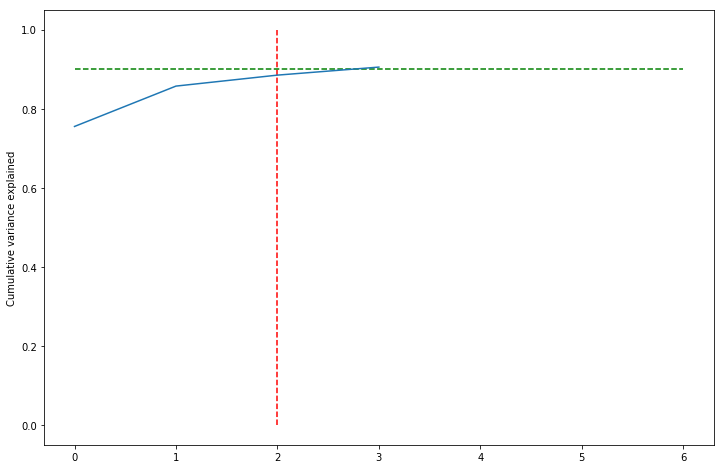

In [267]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=6, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 2 components :

In [268]:
from sklearn.decomposition import IncrementalPCA

In [269]:
pca_final = IncrementalPCA(n_components=2)

In [270]:
df_pca_final = pca_final.fit_transform(df_final)

In [271]:
df_pca_final.shape

(27629, 2)

In [272]:
corrmat = np.corrcoef(df_pca_final.transpose())

In [273]:
corrmat.shape

(2, 2)

Plotting the heatmap of the corr matrix :

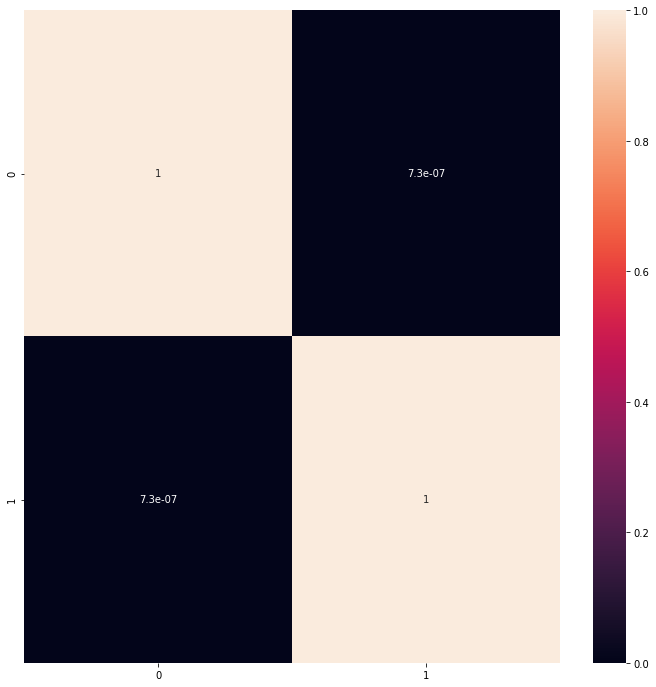

In [274]:
plt.figure(figsize=[12,12])
sns.heatmap(corrmat, annot=True)

In [275]:
pca_final.components_

array([[-9.75870375e-17, -4.44089210e-16, -1.73472348e-18,
         6.32515325e-05,  4.18675613e-05,  7.73783159e-05,
        -4.94318911e-05, -6.61523574e-05, -4.12182602e-05,
         9.80799673e-06, -9.07543323e-06,  2.09946651e-05,
         1.54701916e-03,  5.28982453e-04,  6.47738646e-04,
         1.17739352e-03, -1.14152015e-04, -5.12614765e-05,
         1.39135243e-04,  1.27721322e-04,  1.41393017e-04,
         2.19315511e-04,  2.20088540e-04,  2.31896623e-04,
         3.07659421e-03,  3.14702685e-03,  2.97342389e-03,
        -1.31068237e-04, -2.33160949e-04, -1.42307613e-04,
         2.17302985e-04,  2.14903049e-04,  2.26440909e-04,
        -1.16212862e-04, -1.25955542e-04, -1.04864858e-04,
        -1.40865482e-04, -1.49825766e-04, -1.30447118e-04,
         5.60190677e-04,  5.66398696e-04,  5.34336729e-04,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -1.63483655e-04, -1.77210746e-04, -1.48912454e-04,
        -2.03199066e-05,  1.04334744e-05, -1.11224328e-0

In [276]:
pca_final.explained_variance_ratio_

array([0.75520731, 0.10211567])

Making a dataframe out of it for convenience :

In [277]:
df1 = pd.DataFrame(df_pca_final, columns=["PC1", "PC2"])
df1.head()

,PC1,PC2
0,-943.264407,19.868134
1,-528.628374,-199.151548
2,-638.420694,-202.583638
3,98.098785,-87.825264
4,-94.423319,-183.461589


In [278]:
#id = pd.DataFrame(ID)
df_mod = pd.concat([df1, x], axis=1)
df_mod.head()

,PC1,PC2,Churn
0,-943.264407,19.868134,0
1,-528.628374,-199.151548,0
2,-638.420694,-202.583638,0
3,98.098785,-87.825264,0
4,-94.423319,-183.461589,0


In [279]:
df_mod['Churn'].unique()

array([0, 1], dtype=int64)

In [280]:
print(df_mod.Churn.value_counts()*100/df_mod.shape[0])

0    97.245648
1     2.754352
Name: Churn, dtype: float64


In [281]:
df_mod.shape

(27629, 3)

In [282]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27629 entries, 0 to 27628
Data columns (total 3 columns):
PC1      27629 non-null float64
PC2      27629 non-null float64
Churn    27629 non-null int64
dtypes: float64(2), int64(1)
memory usage: 647.6 KB


## Modelling :

In [283]:
# divide data into train and test
X = df_mod.drop('Churn', axis = 1)
y = df_mod['Churn']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y)
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (19340, 2)
Number transactions y_train dataset:  (19340,)
Number transactions X_test dataset:  (8289, 2)
Number transactions y_test dataset:  (8289,)


### Train-Test Split using SMOTE Algorithm

This is done to compensate for the huge class imbalance in the target variable. As calculated earlier, the class we are trying to interested in is only 2.754352% of the complete data

In [285]:
#import SMOTE module from imblearn library 
#pip install -U imbalanced-learn 
#conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (37614, 2)
After OverSampling, the shape of train_y: (37614,) 

After OverSampling, counts of label '1': 18807
After OverSampling, counts of label '0': 18807


In [286]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import os
# hide warnings
import warnings

### Logistic Regression

Let's run Logistic regresion and evaluate the model

In [287]:
# PCA
pca = PCA()

# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [1,2], 'logistic__C': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='precision', n_jobs=-1, verbose=1)

In [288]:
# fit model
model.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:   45.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           c...
                          

In [289]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.726782,0.341403,0.000000,0.000000,0.0001,l1,1,"{'logistic__C': 0.0001, 'logistic__penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,112
1,0.015391,0.000488,0.000000,0.000000,0.0001,l1,2,"{'logistic__C': 0.0001, 'logistic__penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
2,0.229456,0.075129,0.014992,0.005996,0.0001,l2,1,"{'logistic__C': 0.0001, 'logistic__penalty': '...",0.601700,0.593750,0.597543,0.595150,0.596679,0.596965,0.002701,55
3,0.057566,0.005744,0.010993,0.002280,0.0001,l2,2,"{'logistic__C': 0.0001, 'logistic__penalty': '...",0.601160,0.594811,0.597751,0.594533,0.596348,0.596921,0.002414,56
4,0.059763,0.015267,0.000000,0.000000,0.001,l1,1,"{'logistic__C': 0.001, 'logistic__penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
5,0.016192,0.001720,0.000000,0.000000,0.001,l1,2,"{'logistic__C': 0.001, 'logistic__penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
6,0.085348,0.007251,0.009794,0.001468,0.001,l2,1,"{'logistic__C': 0.001, 'logistic__penalty': 'l...",0.602218,0.595400,0.598103,0.596550,0.597452,0.597945,0.002322,54
7,0.058365,0.007985,0.010993,0.002096,0.001,l2,2,"{'logistic__C': 0.001, 'logistic__penalty': 'l...",0.603962,0.596678,0.600252,0.596146,0.598940,0.599196,0.002812,27
8,0.057566,0.006707,0.000000,0.000000,0.01,l1,1,"{'logistic__C': 0.01, 'logistic__penalty': 'l1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
9,0.018591,0.004027,0.000000,0.000000,0.01,l1,2,"{'logistic__C': 0.01, 'logistic__penalty': 'l1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,97


In [290]:
#print best hyperparameters
print("Best precision: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best precision:  0.5999635746707191
Best hyperparameters:  {'logistic__C': 5.0, 'logistic__penalty': 'l2', 'pca__n_components': 2}


####  Prediction on test data :

In [291]:
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[4033 4028]
 [  67  161]]
Sensitivity: 	0.71
Specificity: 	0.5


In [292]:
from sklearn.metrics import recall_score

In [293]:
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Recall: 0.706140


### Random Forest

Random Forest is another model that can be evaluated to see if we get desired outputs

In [294]:
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model1 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='precision', n_jobs=-1, verbose=1)

In [295]:
# fit model
model1.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              o

In [296]:
# print best hyperparameters
print("Best precision: ", model1.best_score_)
print("Best hyperparameters: ", model1.best_params_)

Best precision:  0.8117803621714531
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


#### Prediction on test data :

In [305]:
y_pred1 = model1.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred1, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[6503 1558]
 [ 151   77]]
Sensitivity: 	0.34
Specificity: 	0.81


In [306]:
recall1 = recall_score(y_test, y_pred1)
print('Recall: %f' % recall1)

Recall: 0.337719


In this case study, we are more interested in predicting the churn or the customers tagged as 1 correctly, therefore, the metric we will use to evaluate the models is Sensitivity.

Among Logistic Regression and Random Forest, the sensitivity is acceptable at 71% for Logistic Regression as compared to a very low 34% for Random Forest

Therefore the preferred model is PCA coupled with logistic Regression

### Understanding which attributes contribute most to the predicting the churners

In [307]:
from sklearn.linear_model import Lasso

In [308]:
df_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Recency
0,0.0,0.0,0.0,-0.492720,-0.190529,-1.017963,0.447907,0.234619,-0.537118,-0.674673,-0.707884,-0.517444,0.0,0.0,0.0,0.0,0.0,0.0,1.615441,0.992383,-0.459104,-0.393373,-0.458963,-0.531208,0.00,0.0,0.00,0.0,0.0,7.15,0.416564,0.111540,-0.594217,-0.109743,-0.086644,-0.383269,-0.481014,-0.492564,-0.243935,0.0,0.0,0.0,0.0,0.0,0.0,-0.385504,-0.380117,-0.403962,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,-0.154818,-0.312914,-0.648953,-0.387236,-0.538643,-0.631758,-0.528855,-0.802003,15.48,0.00,0.00,0.00,-0.584815,-0.827968,-0.838444,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,-0.614713,-0.881412,-0.897220,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,-0.506056,-0.134963,-1.052667,-0.562385,-0.080950,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,0.813669,-0.502749,-0.768087,0.270146,-0.307492,0.00,356.00,0.03,-0.494968,0.667783,-0.482393,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,1.0,315.0,-0.420771,2.195105,-0.061321,0.0,0.0
1,0.0,0.0,0.0,-0.101978,0.106631,0.303385,-0.395038,-0.325087,-0.400093,0.986386,1.268841,1.636660,0.0,0.0,0.0,0.0,0.0,0.0,-0.527364,-0.511716,-0.376934,-0.339648,-0.372281,-0.253494,0.75,0.0,1.58,0.0,0.0,0.00,-0.499595,-0.522838,-0.370415,-0.169159,-0.109002,-0.255705,1.632980,1.918891,2.420265,0.0,0.0,0.0,0.0,0.0,0.0,0.840031,1.060307,1.236511,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.427624,0.632593,0.821417,-0.612365,-0.535027,-0.426031,-0.171544,-0.445199,129.16,4.61,2.84,10.39,-0.410004,-0.576018,-0.272396,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,-0.267496,-0.540939,-0.085169,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,-0.118599,0.046901,0.254400,-0.878638,-0.886896,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,-0.787834,-0.744562,-0.768087,-0.789427,-0.736695,0.00,0.00

In [309]:
df_final.shape

(27629, 150)

In [310]:
y.shape

(27629,)

In [311]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()
# cross validation
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_final, y) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   51.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [312]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
0.9039237636900191


In [313]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
        
lasso.fit(df_final, y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [314]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.36163759e-03,
        2.40503056e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.51748616e-03,  0.00000000e+00,  0.00000000e+00, -1.23473482e-03,
       -3.90678338e-06,  1.05502572e-04,  1.00402356e-04,  1.60426471e-05,
        2.20222674e-04,  2.87593764e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.70847819e-03, -1.15971411e-03, -0.00000000e+00,
       -9.03039809e-05, -2.87380462e-05,  1.19327731e-05, -1.08405703e-04,
        2.49879135e-05,  3.16251295e-04, -0.00000000e+00, -1.49853899e-03,
       -0.00000000e+00,  1.14426521e-02,  0.00000000e+00, -1.54856748e-02,
        5.59429272e-03,  1.41463376e-03, -1.34256496e-02, -5.97580574e-05,
       -2.50434252e-04, -7.88573362e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.02016137e-02,  1.91865070e-02, -1.20305319e-02,
       -0.00000000e+00, -5.25460044e-05, -0.00000000e+00, -1.65037525e-05,
        5.75163208e-05, -

In [315]:
print("Lasso picked " + str(sum(lasso.coef_ != 0)) + " variables and eliminated the other " +  str(sum(lasso.coef_ == 0)) + " variables")

Lasso picked 73 variables and eliminated the other 77 variables


In [316]:
coef_dict = dict(zip(df_final, lasso.coef_))

In [317]:
coef_dict

{'loc_og_t2o_mou': 0.0,
 'std_og_t2o_mou': 0.0,
 'loc_ic_t2o_mou': 0.0,
 'arpu_6': 0.0033616375927503495,
 'arpu_7': 0.0024050305573171888,
 'arpu_8': -0.0,
 'onnet_mou_6': 0.0,
 'onnet_mou_7': 0.0,
 'onnet_mou_8': -0.001517486157820948,
 'offnet_mou_6': 0.0,
 'offnet_mou_7': 0.0,
 'offnet_mou_8': -0.0012347348215304334,
 'roam_ic_mou_6': -3.906783380491902e-06,
 'roam_ic_mou_7': 0.00010550257154312575,
 'roam_ic_mou_8': 0.00010040235560263998,
 'roam_og_mou_6': 1.6042647089369247e-05,
 'roam_og_mou_7': 0.00022022267427653443,
 'roam_og_mou_8': 0.00028759376407205833,
 'loc_og_t2t_mou_6': -0.0,
 'loc_og_t2t_mou_7': -0.0,
 'loc_og_t2t_mou_8': -0.0,
 'loc_og_t2m_mou_6': -0.0027084781928856405,
 'loc_og_t2m_mou_7': -0.0011597141068911943,
 'loc_og_t2m_mou_8': -0.0,
 'loc_og_t2f_mou_6': -9.03039809406883e-05,
 'loc_og_t2f_mou_7': -2.873804618124402e-05,
 'loc_og_t2f_mou_8': 1.1932773120666187e-05,
 'loc_og_t2c_mou_6': -0.00010840570337126167,
 'loc_og_t2c_mou_7': 2.4987913518423067e-05,
 '

In [318]:
coef = pd.Series(lasso.coef_, index = df_final.columns)

Text(0.5, 1.0, 'Feature importance using Lasso Model')

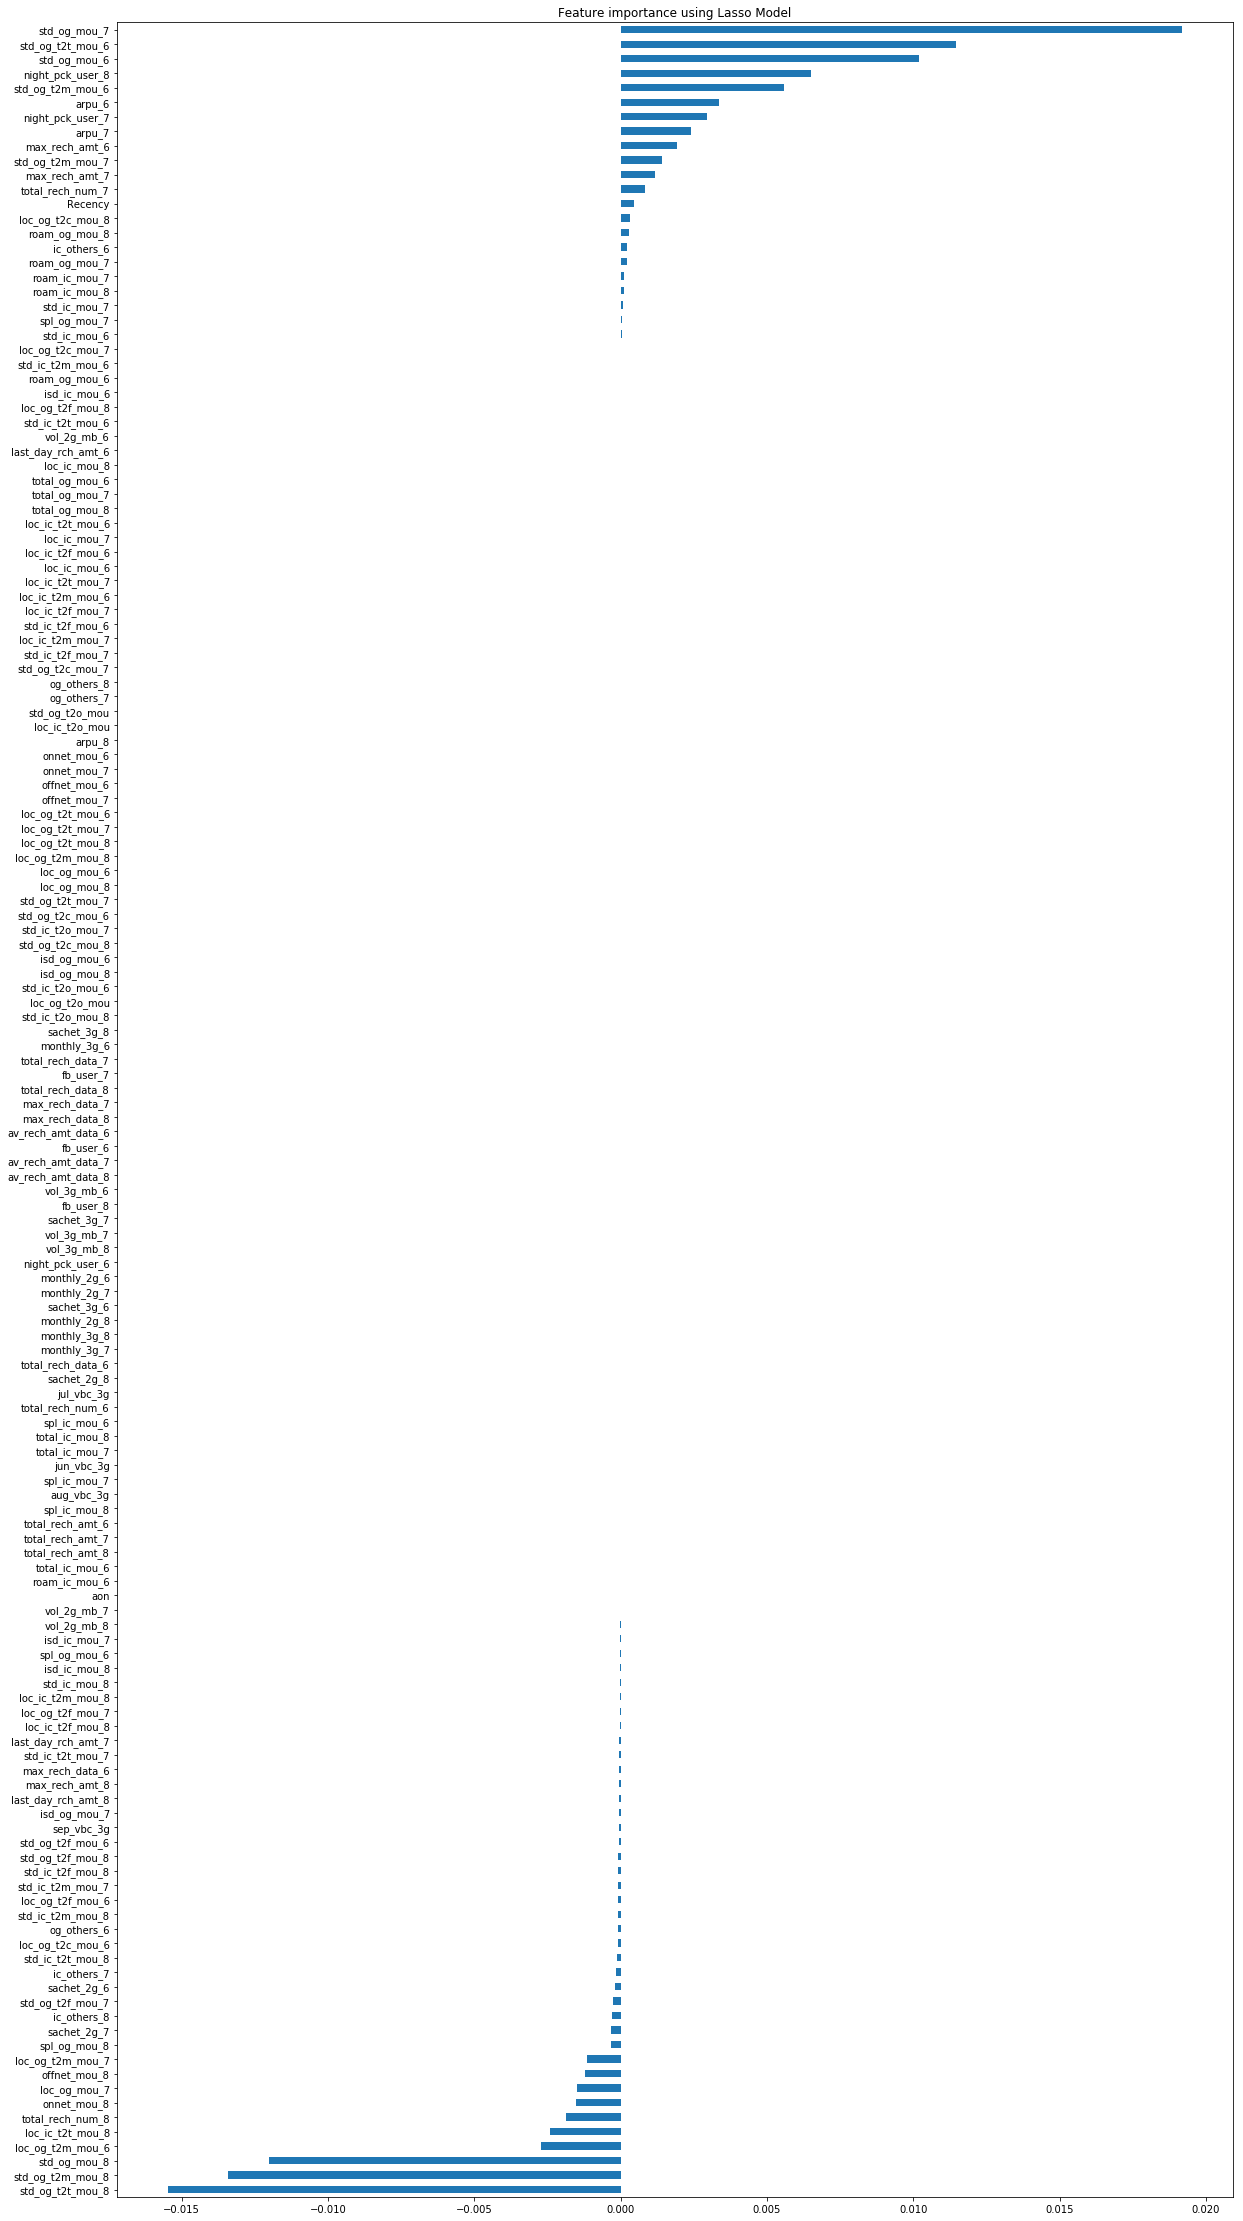

In [319]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 40.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#### Important Features with their coefficients :

In [320]:
df_impt = df_final[['std_og_mou_7','std_og_t2t_mou_6','std_og_mou_6','night_pck_user_8','std_og_t2m_mou_6','arpu_6',
'std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_mou_8','loc_og_t2m_mou_6','loc_ic_t2t_mou_8','total_rech_num_8']]

#Important Features along with their coefficients are :
- std_og_mou_7        : 0.019186507026050445
- std_og_t2t_mou_6    : 0.00559429271591727
- std_og_mou_6        : 0.010201613737914035
- night_pck_user_8    : 0.006511424344062228
- std_og_t2m_mou_6    : 0.00559429271591727
- arpu_6              : 0.0033616375927503495
- std_og_t2t_mou_8    : -0.015485674770530155  
- std_og_t2m_mou_8    : -0.013425649586662607
- std_og_mou_8        : -0.012030531870431727
- loc_og_t2m_mou_6    : -0.0027084781928856405 
- loc_ic_t2t_mou_8    : -2.8601700581950243e-05
- total_rech_num_8    : -0.0018817391312981556  

## Business Insights

From the attribute importance above, we can make below reccommendations to the telecom company 

- If the customer has done a recharge in the 8th month, it is unlikely that the customer will churn.
- Similarly, more recent the recharge done by the customer, less likely that the customer will churn.

- When you look at outgoing minutes of usage, when the minutes of usage drops, especially in the 8th month, the likelihood that the customer will churn is very high. These kind of customers need to be targeted for special offers and discounts and ensure that they recharge, as making a recharge amount gives confidence that the customer will not churn

- We see that even if customers are using the connection to have incoming calls, their likelihood to churn is low. In the sense, even if there is less/no outgoing calls, if the customer is using for incoming calls, they will likely not churn, however, are these customers creating any revenue for the company needs more data and analysis.

- If the customer has not a recharge in the 8th month, then the company needs to immediately target these customers and provide offers and discounts to make sure the customer is retained.